# Example 2: active rotations in $\unicode{0x211D}^3$

In this example we study simple rotations of vectors from $\unicode{0x211D}^3$, i.e.
$$\vec{r}'={\cal{R}}\vec{r}\,.$$ To this end, we define functions for the multiplication 
of vectors with $3\times 3$ matrices, as well as the product of two such matrices. 
Furthermore, we implement the calculation of the determinant of a $3\times 3$ matrix, 
to be able to check the corresponding condition for orthogonal rotation matrices, i.e.
$\det({\cal{R}})=+1$.

### definition of matrices and vectors for diplay purposes only (can be ignored)

In [169]:
from IPython.display import Markdown, Latex, Math

def bmatrix(a):
    """Returns a LaTeX vmatrix

    :a: numpy array
    :returns: LaTeX vmatrix as a string
    """
    lines = str(a).replace('[', '').replace(']', '').splitlines()
  
    rv = [r'\begin{vmatrix}']
    rv += ['  ' + ' & '.join(l.split()) + r'\\' for l in lines]
    rv +=  [r'\end{vmatrix}']
    return '\n'.join(rv)

def lvector(a):
    """Returns a LaTeX vector

    :a: numpy array
    :returns: LaTeX pmatrix as a string
    """
    lines = str(a).replace('[', '').replace(']', '').replace(',','').splitlines()
  
    rv = [r'\begin{pmatrix}']
    rv += [r' \\ '.join(l.split()) for l in lines]
    rv +=  [r'\end{pmatrix}']
    return '\n'.join(rv)



### definition of products of a matrix with another matrix or a vector, as well as the matrix determinant

In [170]:
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from numpy import cos, sin 
import math

## definition of the matix-vector multiplication
def MatrixVectorProduct( mat, vecpre):
    """Returns the result of a matrix-vector Multiplication
    
    :mat:    3x3 Matrix
    :vecpre: 3D vector
    :vecnew: resulting vector"""
    vecnew= [0,0,0]
    if len(vecpre) == 3 :
        for i in range (0,3):
            for j in range (0,3):
                vecnew[i]+=mat[i][j]*vecpre[j] 
    else :
        print('Error: Wrong dimensions')
    return vecnew

## definition of the matix product
def MatrixProduct( mat1, mat2):
    """Returns the result of a matrix Multiplication
    
    :mat1, mat2:    3x3 Matrix
    :matnew: resulting matrix"""
    matnew= [[0,0,0],[0,0,0],[0,0,0]]
    for i in range (0,3):
        for j in range (0,3):
            for k in range (0,3):
                matnew[i][j]+=mat1[i][k]*mat2[k][j] 
    return matnew

## definition of the matix determinant
def Matrix3Determinant(mat3,column):
    """Returns the determinant of a 3x3 Matrix
    
    :mat3:   3x3 Matrix
    :column: compute determinant along column
    :return: determinant"""
    det = 0
    if column < 0 or column > 2 :
        print('Error in Maxtrix3Determinant: wrong column number')
    #delete column 
    mat_tmp = np.delete(mat3,column,1)
    for i in range (0,3):
        #delete row i
        mat2 = np.delete(mat_tmp,i,0)
        det += pow(-1,i+column)*mat3[i][column]*Matrix2Determinant(mat2)
    return det 

##definition of the 2x2 matix determinant
def Matrix2Determinant(mat2):
    det = mat2[0][0]*mat2[1][1]-mat2[1][0]*mat2[0][1]
    return det


### Example calculation of a matrix determinant

In [171]:
# input of matrix to compute the determinant for
A = [[1,2,3],[3,2,1],[1,4,2]]
det=Matrix3Determinant(A,2)

Markdown("""

$$A={x}\\,,\\quad\\det(A)={det}$$""".format(x=bmatrix(np.matrix(A)), det=det))




$$A=\begin{vmatrix}
  1 & 2 & 3\\
  3 & 2 & 1\\
  1 & 4 & 2\\
\end{vmatrix}\,,\quad\det(A)=20$$

### Rotations in $\unicode{0x211D}^3$: definition of rotation angles and input vector

In [172]:
####################################################################################################################

## input rotation angles here
phix = np.pi/8
phiy = 0.1
phiz = 0.5

## input of vector to be rotated
vr = [1,1,1]

## definition of Rotation Matrices
Rx = [[1,0,0],[0,cos(phix),-sin(phix)],[0,sin(phix),cos(phix)]]
Ry = [[cos(phiy),0,sin(phiy)],[0,1,0],[-sin(phiy),0,cos(phiy)]]
Rz = [[cos(phiz),-sin(phiz),0],[sin(phiz),cos(phiz),0],[0,0,1]]

## corresponding determinants 
detRx = Matrix3Determinant(Rx,0)
detRy = Matrix3Determinant(Ry,0)
detRz = Matrix3Determinant(Rz,0)

####################################################################################################################

##calculation of matrix-vector product
## in the example: rotation of r around z-Axis by angle phiz
vrp=MatrixVectorProduct(Rz,vr)

## resulting rotation matrices for combination of two rotations
Rxy=MatrixProduct(Rx,Ry)
Ryx=MatrixProduct(Ry,Rx)


In [173]:
Markdown("""
## Illustrating the Results
## Rotation Matrices
$$R_x={x}\\,,\\quad \\det(R_x)={detRx}$$
$$R_y={y}\\,,\\quad \\det(R_y)={detRy}$$
$$R_z={z}\\,,\\quad \\det(R_z)={detRz}$$

## Vector to be rotated
$$\\vec r={vr}$$

## Rotated Vector
$$\\vec r'=R_z\\vec r={vrp}$$

## Matrix Products 

$$R_{{xy}}={xy}$$

$$R_{{yx}}={yx}$$

$$\Rightarrow R_{{xy}} \\neq R_{{yx}}$$""".format(vr=lvector(vr),vrp=lvector(vrp),xy=bmatrix(np.around(Rxy,decimals=2)),yx=bmatrix(np.around(Ryx,decimals=2)),x=bmatrix(np.around(Rx,decimals=2)), y=bmatrix(np.around(Ry,decimals=2)),z=bmatrix(np.around(Rz,decimals=2)),detRx=detRx,detRy=detRy,detRz=detRz))




## Illustrating the Results
## Rotation Matrices
$$R_x=\begin{vmatrix}
  1. & 0. & 0.\\
  0. & 0.92 & -0.38\\
  0. & 0.38 & 0.92\\
\end{vmatrix}\,,\quad \det(R_x)=1.0$$
$$R_y=\begin{vmatrix}
  1. & 0. & 0.1\\
  0. & 1. & 0.\\
  -0.1 & 0. & 1.\\
\end{vmatrix}\,,\quad \det(R_y)=1.0$$
$$R_z=\begin{vmatrix}
  0.88 & -0.48 & 0.\\
  0.48 & 0.88 & 0.\\
  0. & 0. & 1.\\
\end{vmatrix}\,,\quad \det(R_z)=1.0$$

## Vector to be rotated
$$\vec r=\begin{pmatrix}
1 \\ 1 \\ 1
\end{pmatrix}$$

## Rotated Vector
$$\vec r'=R_z\vec r=\begin{pmatrix}
0.39815702328616975 \\ 1.3570081004945758 \\ 1
\end{pmatrix}$$

## Matrix Products 

$$R_{xy}=\begin{vmatrix}
  1. & 0. & 0.1\\
  0.04 & 0.92 & -0.38\\
  -0.09 & 0.38 & 0.92\\
\end{vmatrix}$$

$$R_{yx}=\begin{vmatrix}
  1. & 0.04 & 0.09\\
  0. & 0.92 & -0.38\\
  -0.1 & 0.38 & 0.92\\
\end{vmatrix}$$

$$\Rightarrow R_{xy} \neq R_{yx}$$

<IPython.core.display.Javascript object>


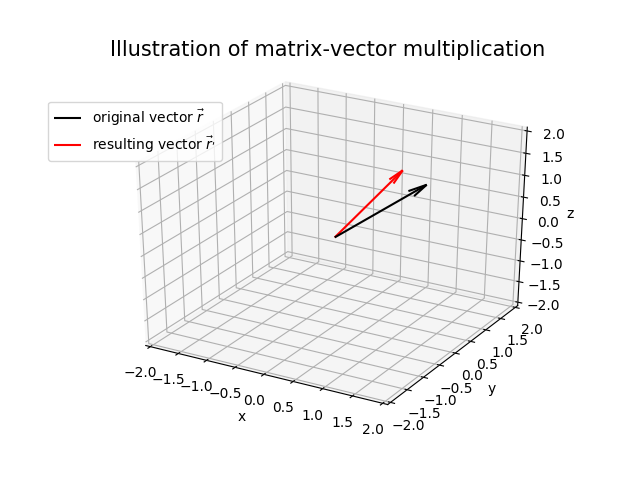

In [174]:
## setup for plotting the vectors
r_pre=np.array([0,0,0,vr[0],vr[1],vr[2]])
r_past=np.array([0,0,0,vrp[0],vrp[1],vrp[2]])

fig = plt.figure(1)
ax = fig.add_subplot(111, projection='3d')

## plot initial vector 
vprelength=np.linalg.norm(vr)
ax.quiver(r_pre[0],r_pre[1],r_pre[2],r_pre[3],r_pre[4],r_pre[5],color='black',
            pivot='tail',arrow_length_ratio=0.3/vprelength, label='original vector $\\vec{r}$')

## plot transformed vector
vpastlength=np.linalg.norm(vrp)
ax.quiver(r_past[0],r_past[1],r_past[2],r_past[3],r_past[4],r_past[5],color='r',
            pivot='tail',arrow_length_ratio=0.3/vpastlength, label='resulting vector $\\vec{r}^,$')

ax.set_xlim([-2,2])
ax.set_ylim([-2,2])
ax.set_zlim([-2,2])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z',labelpad=0)
plt.title('Illustration of matrix-vector multiplication\n',fontsize=15)
plt.legend(bbox_to_anchor=(0.3, 0.9))
plt.show()